# 아마존 세일즈 데이터 EDA - Review를 중심으로

In [85]:
# Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
# from tqdm import tqdm_notebook
warnings.simplefilter(action='ignore')
%matplotlib inline

In [86]:
# Load the dataset (CSV File)
df = pd.read_csv('../../data/amazon.csv', encoding='utf-8')
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [88]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### 데이터셋 확인 결과
* 총 16개의 열과 1465개의 행으로 이루어져 있음.
* 현재 모든 데이터 타입이 object으로 구성되어져 있음.
* 'rating_count' 컬럼에서 2개의 null값이 발견됨. 해당 컬럼은 특성 상 0이거나 양의 자연수 값을 가져야 함.

### 확인 후 수정사항
* 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count' 는 float 타입으로 변경
* rating_count 값 확인 후 len(rating)으로 변경하거나, 아무런 리뷰가 없을 경우 0으로 바꾸기.
* 현재 price 표기는 '₹'(인도 루피)로 되어 있어, 해석상의 편의를 위해 원화로 변경할 수 있어보임.

## 1. 데이터 타입 변경하기

In [89]:
def clean_price(price):
    return price.str.replace('₹', '').str.replace(',', '').astype('float64')

def clean_percentage(percentage):
    return percentage.str.rstrip('%').astype('float64') / 100

# Cleaning price columns
for col in ['discounted_price', 'actual_price']:
    df[col] = clean_price(df[col])

# Cleaning discount percentage
df['discount_percentage'] = clean_percentage(df['discount_percentage'])

### 문제점 1. 별점 중 숫자로 변경할 수 없는 문자 '|'가 섞임.

In [90]:
# Finding unusual string in rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [91]:
# Check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


### 문제점 1의 해결. 아마존 인도 웹사이트에서 해당 제품 ID를 기반으로 별점 직접 확인
- 제품 ID: B08L12N5H1
- 관련 웹사이트: https://www.amazon.in/dp/B08L12N5H1
- 별점 수정사항 '|' --> '3.9'

한계: 데이터셋이 저장된 2022년 기준이 아닌, 2024년 기준 별점 데이터값 확인

In [92]:
# Changing Rating Columns Data Type
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [93]:
# Change Rating Count Columns Data Type
df['rating_count'] = clean_price(df['rating_count'])
df['rating_count'].head(5)

0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64

### 문제점 2. Rating Count의 Null 값 존재
- 관련 웹사이트 1: https://www.amazon.in/dp/B0B94JPY2N
- 관련 웹사이트 2: https://www.amazon.in/dp/B0BQRJ3C47 (접근 불가)

2024년 기준 B0B94JPY2N의 별점 개수(rating count)는 58개, B0BQRJ3C47는 현재 판매 중지된 상품이다.

아래의 두가지 옵션 중, 해당 칼럼의 중요성을 고려했을 때, 옵션 1로 진행하는 것이 타당해보임.
- 옵션 1. 해당 null 값 데이터 칼럼 삭제
- 옵션 2. 임의의 값 넣기 (0, median 값, 혹은 임의의 랜덤 값)
    - df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

#### <span style="color:orange"> 데이터 삭제/수정은 현재 단계에서 진행하지 않기로 함 </span>

In [94]:
# Check the null row
df_null = df.query('rating_count.isnull()')
df_null

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


### <span style="color:red"> (2024. 10. 10 added) </span> 문제점 3: 중복 데이터 발견
* 하나의 제품(동일 product_id)에 대해, 가격/할인율 관련 데이터(discounted_price, actual_price등)와 리뷰 관련 데이터(review_id, review_content 등)이 동일하지만,
* 두 개의 열로 나뉘어져 있는 경우가 있었음

In [95]:
# 데이터셋 내 중복되는 값이 있는지 확인
# 만약 있다면 df.drop_duplicates(keep='last')
print("데이터프레임 전체 기준 중복 데이터 여부: ", df.duplicated().any()) 
print("Review_id 기준 중복 데이터 여부: ", df['review_id'].duplicated().any()) 

데이터프레임 전체 기준 중복 데이터 여부:  False
Review_id 기준 중복 데이터 여부:  True


In [132]:
df.sort_values(by='product_id').head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,review_length,processed_review
881,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,483,although it did take me a little bit of time t...
46,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,483,No review text
143,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749.0,1339.0,0.44,4.2,179692.0,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,3989,Just loved it
721,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399.0,499.0,0.20,4.3,27201.0,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,1060,the packaging was open and not sealed when I r...
724,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279.0,375.0,0.26,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,635,Sometimes the remote gets disconnected with th...


In [97]:
# 중복 행 비교 분석을 위한 함수 작성: compare_rows, find_similar_rows, compare_two_rows
# 가독성을 위해 최소화 처리를 해두었으니, 필요시 '>'를 눌러서 확대 가능

def compare_rows(df, id_column='review_id'):
    # Group by the ID column and find groups with more than one row
    groups = df.groupby(id_column)
    duplicate_groups = [group for name, group in groups if len(group) > 1]

    for group in duplicate_groups:
        print(f"\nComparing rows with {id_column}: {group[id_column].iloc[0]}")
        
        # Compare each row with the first row in the group
        first_row = group.iloc[0]
        for idx, row in group.iloc[1:].iterrows():
            print(f"Differences in row {idx}:")
            for column in df.columns:
                if row[column] != first_row[column]:
                    print(f"  {column}:")
                    print(f"    Row 1: {first_row[column]}")
                    print(f"    Row 2: {row[column]}")

# Example usage:
# Assuming your DataFrame is named df
# compare_rows(df)

# If you want to compare based on a different column, e.g., 'user_id':
# compare_rows(df, id_column='user_id')

# Function to find and display rows with slight differences
def find_similar_rows(df, threshold=0.9):
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            similarity = df.iloc[i].eq(df.iloc[j]).mean()
            if similarity > threshold and similarity < 1:
                print(f"\nRows {i} and {j} are {similarity:.2%} similar:")
                print("\nDifferences:")
                for col in df.columns:
                    if df.iloc[i][col] != df.iloc[j][col]:
                        print(f"{col}:")
                        print(f"  Row {i}: {df.iloc[i][col]}")
                        print(f"  Row {j}: {df.iloc[j][col]}")

# Example usage:
# find_similar_rows(df, threshold=0.9)

# Function to compare two specific rows
def compare_two_rows(df, row1_index, row2_index):
    row1 = df.iloc[row1_index]
    row2 = df.iloc[row2_index]
    
    print(f"\nComparing row {row1_index} and row {row2_index}:")
    for column in df.columns:
        if row1[column] != row2[column]:
            print(f"  {column}:")
            print(f"    Row {row1_index}: {row1[column]}")
            print(f"    Row {row2_index}: {row2[column]}")

#### 중복 행 관련
* 인덱스 기준 '84' 행과 '1010'의 동일하기 보여서, 자세한 비교를 위해 어떤 부분에서 차이가 나는지 확인함.
* 만일 img_link, product_link와 같이 <b> 무의미한 데이터</b>를 기준으로 차이가 난다면 해당 중복 행은 삭제하는 것이 타당해 보임.
* (881, 46) 두 가지의 행도 동일한 이슈를 겪고 있음

In [133]:
compare_two_rows(df, 881, 46)


Comparing row 881 and row 46:
  img_link:
    Row 881: https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31+NwZ8gb1L._SX300_SY300_.jpg
    Row 46: https://m.media-amazon.com/images/I/31+NwZ8gb1L._SX300_SY300_.jpg
  product_link:
    Row 881: https://www.amazon.in/D-Link-DWA-131-Wireless-Adapter-Black/dp/B002PD61Y4/ref=sr_1_327?qid=1672903011&s=computers&sr=1-327
    Row 46: https://www.amazon.in/D-Link-DWA-131-Wireless-Adapter-Black/dp/B002PD61Y4/ref=sr_1_50?qid=1672909126&s=electronics&sr=1-50
  processed_review:
    Row 881: although it did take me a little bit of time to get used to it.However
    Row 46: No review text


### 해결책: 리뷰 데이터 기준 중복 데이터 삭제
* '무의미한 데이터'에 대한 기준은 각자 맡은 파트에 따라 차이가 있을 것으로 보임.
* 우선은 리뷰 데이터를 중심적으로 파악하고자 하기에, 해당 쥬피터 노트북 파일에서는 'review_id'가 동일한 경우에는 중복 행을 삭제함.
* 이에 기존 1465개의 행에서 <span style="color:orange">1194개</span>로 줄어듦.

In [99]:
df_unique = df.drop_duplicates(subset='review_id', keep='first')

# Reset the index if needed
df_unique = df_unique.reset_index(drop=True)

# Display the first few rows and the shape of the new DataFrame
print(df_unique.head())
print(f"Shape of the DataFrame: {df_unique.shape}")

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0       

### <span style="color:red"> (2024. 10. 10 added) </span> 문제점 4. 여러 개의 리뷰 데이터 분리 필요성

* user_id, user_name, review_id, review_title, review_title이 1개가 아닌 여러개가 묶여있는 경우가 있음.
* 우선 1개의 제품에 대하여 유저 1명은 별점 및 평점을 1번만 남겼을 것이라고 <span style="color:red"> 가정</span>함.


    * (1) 데이터 확인 시 쉼표(,)로 데이터가 구분되어 있는 것으로 파악됨
    * (2) 이후, 제품 1개 리뷰 콘텐츠 중 user_id 또는 review_id를 기준으로 최대 행 개수를 결정함.
    * (3) 1개의 행을 최대 행 개수를 기준으로 분리 시킨 뒤 신규 데이터 프레임으로 저장함.

* 해당 데이터 분리는 원본 데이터 df가 아닌, 중복 데이터를 삭제한 <span style="color:orange">df_unique</span>를 기준으로 진행함.

In [100]:
def split_reviews(df):
    # List of columns to split
    split_columns = ['user_id', 'user_name', 'review_id', 'review_title', 'review_content']
    
    # Function to split a row
    def split_row(row):
        # (1) Split the values for each column
        split_values = [row[col].split(',') for col in split_columns]
        
        # (2) Determine the number of splits based on user_id or review_id
        num_splits = max(len(row['user_id'].split(',')), len(row['review_id'].split(',')))
        
        # (3) Create new rows
        new_rows = []
        for i in range(num_splits):
            new_row = row.copy()
            for col, values in zip(split_columns, split_values):
                new_row[col] = values[i] if i < len(values) else values[-1]
            new_rows.append(new_row)
        
        return pd.DataFrame(new_rows)

    # Apply the split_row function to each row and concatenate the results
    return pd.concat([split_row(row) for _, row in df.iterrows()], ignore_index=True)

# Apply the function to split the reviews
df_split = split_reviews(df_unique)

# Display the result
print("====== Before Split ======")
print(df_unique['review_content'].head(5))
print("====== After Split ======")
print(df_split['review_content'].head(5))

# Optionally, save the result to a new CSV file
# df_split.to_csv('split_reviews.csv', index=False)

====== Before Split ======
0    Looks durable Charging is fine tooNo complains...
1    I ordered this cable to connect my phone to An...
2    Not quite durable and sturdy,https://m.media-a...
3    Good product,long wire,Charges good,Nice,I bou...
4    Bought this instead of original apple, does th...
Name: review_content, dtype: object
====== After Split ======
0       Looks durable Charging is fine tooNo complains
1                              Charging is really fast
2                                        good product.
3                 Till now satisfied with the quality.
4    This is a good product . The charging speed is...
Name: review_content, dtype: object


### 해결책: 기존 1100여개 였던 데이터 개수(중복제외)가 <span style="color:orange">9,300여개</span>로 늘어남.

In [101]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9364 entries, 0 to 9363
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           9364 non-null   object 
 1   product_name         9364 non-null   object 
 2   category             9364 non-null   object 
 3   discounted_price     9364 non-null   float64
 4   actual_price         9364 non-null   float64
 5   discount_percentage  9364 non-null   float64
 6   rating               9364 non-null   float64
 7   rating_count         9362 non-null   float64
 8   about_product        9364 non-null   object 
 9   user_id              9364 non-null   object 
 10  user_name            9364 non-null   object 
 11  review_id            9364 non-null   object 
 12  review_title         9364 non-null   object 
 13  review_content       9364 non-null   object 
 14  img_link             9364 non-null   object 
 15  product_link         9364 non-null   o

## 2. 데이터 간 상관관계 파악하기
- 데이터 간의 상관관계는 리뷰 데이터를 여러개의 행으로 나누기 전의 오리지널 데이터를 기반으로 분석 진행함.
- 그 이유는 리뷰 수에 따라 한 개의 제품군이 여러개로 늘어나게 되면 가격/할인/리뷰 분석 측면에서 달라질 것으로 봤기 때문임.

In [102]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = [
    'product_id', 'category', 'review_id', 'review_content', 'product_name',
    'user_name', 'about_product', 'user_id', 'review_title', 'img_link', 'product_link'
]

# Dictionary to store LabelEncoder objects
label_encoders = {}

# Encode
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [103]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,399.0,1099.0,0.64,4.2,24269.0,474,623,522,817,881,604,1118,1308
1,848,134,10,199.0,349.0,0.43,4.0,43994.0,279,88,207,1025,7,413,1248,157
2,819,1023,10,199.0,1899.0,0.90,3.9,7928.0,1250,849,482,827,422,674,876,1160
3,643,1264,10,329.0,699.0,0.53,4.2,94363.0,1010,254,614,786,376,269,518,380
4,588,829,10,154.0,399.0,0.61,4.2,16905.0,1189,17,1139,114,44,120,1209,919


### 1) 상관관계 클러스터맵 (Correlation Clustermap) - <span style="color:orange"> 전체 데이터 기준 (중복 포함)</span>

<Figure size 2000x1600 with 0 Axes>

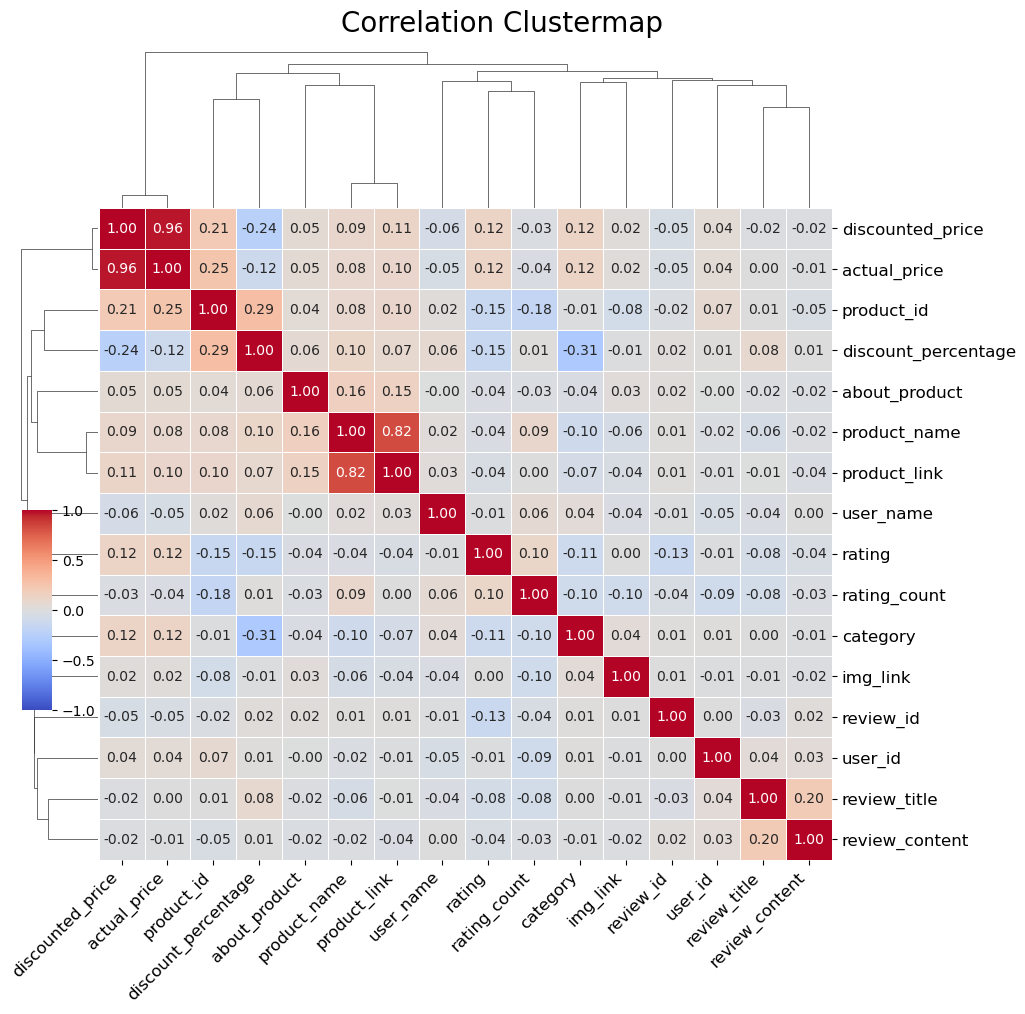

In [104]:
df_corr = df.corr()

plt.figure(figsize=(20, 16))  # Increased figure size
clustermap = sns.clustermap(df_corr, 
                            cmap='coolwarm',
                            vmin=-1, vmax=1, center=0,
                            annot=True, fmt='.2f',
                            linewidths=0.5,
                            cbar_kws={"shrink": .6},  # Slightly larger colorbar
                            annot_kws={"size": 10},  # Increased annotation size
                            dendrogram_ratio=(.1, .2),
                            cbar_pos=(0.02, .32, .03, .2))

# Rotate x-axis labels and increase font size
plt.setp(clustermap.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(clustermap.ax_heatmap.get_yticklabels(), fontsize=12)

# Adjust the layout to prevent clipping of labels
# plt.tight_layout()

# Add a title
plt.suptitle('Correlation Clustermap', fontsize=20, y=1.02)

plt.show()

### 2) 상관관계 히트맵 (Heatmap) - <span style="color:orange"> 전체 데이터 기준 (중복 포함)</span>

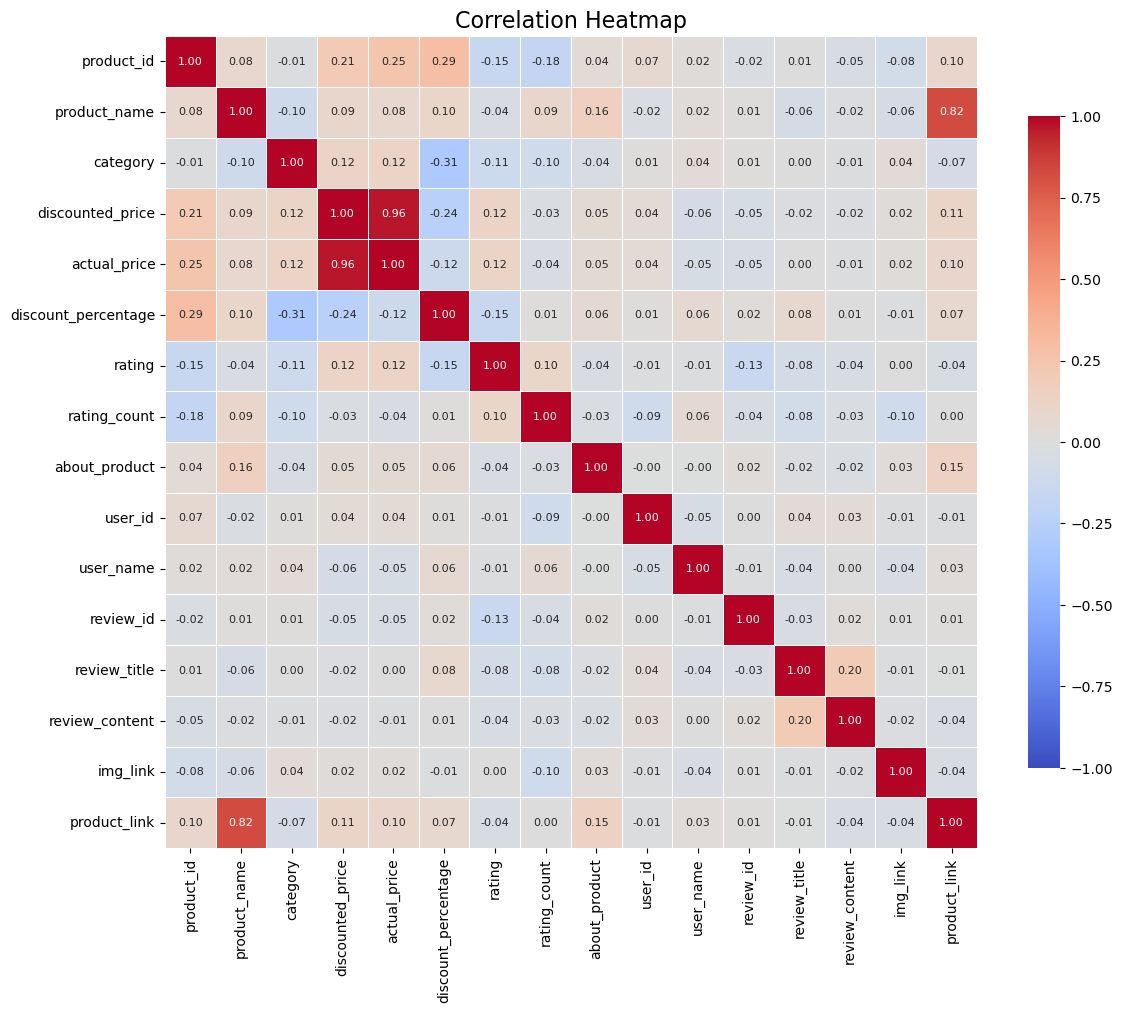

In [105]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8},
            fmt='.2f',
            annot_kws={"size": 8})

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

### 3) Key Takeaways
* 제품 전반에 걸쳐 가격 책정 전략이 일관성 있게 적용되며, 할인도 균일하게 적용되는 것으로 보임.
'discount_percentage'는 'product_id'와 다소 긍정적인 연관성 (0.29)을 보임.
* 'category'가 할인 전략에 영향을 미칠 수 있음. 
'category'와 'discount_percentage'간의 연관성이 엿보임 (-0.31)
* 'user_id'/'user_name'과 다른 변수들과의 연관성은 크게 보이지 않음.
* 'actual_price'/'discounted_price' 와 'rating' 간의 미약한 연관성 (0.12)이 엿보임.
이는, 가격이 높을 수록 별점이 더 높아지는 경향이 약하게나마 존재한다는 뜻임.
* 'about_product'는 다른 변수들과 미약한 연관성을 보여서, 제품 설명이 가격이나 별점에 강하게 영향을 주지 않을 수 있음을 시사함.

In [106]:
# Decode (inverse transform)
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

In [107]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## 3. 리뷰 분석하기

### 1) 필요한 패키지 다운로드
- nltk : 자연어 처리를 위한 파이썬 라이브러리
    * 'punkt': 문장 토큰화를 위한 도구
    * 'stopwords': 불용어(자주 사용되지만 분석에 큰 의미가 없는 단어들) 목록
    * 'punkt_tab': 파일에서 토큰을 추출하는 데 사용되는 도구
- ssl : 인터넷 통신의 보안을 위한 프로토콜, NLTK 데이터를 다운로드할 때 보안 연결을 설정하는 데 사용. 특히, 인증서 검증 없이 HTTPS 연결을 허용하도록 설정

In [108]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/yoorichoi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yoorichoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yoorichoi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

* Counter (collections 모듈의 일부): 파이썬의 내장 데이터 구조로, 항목의 개수를 세는 데 사용, 텍스트에서 각 단어의 빈도수를 계산하는 데 사용

* WordCloud: 텍스트 데이터를 시각적으로 표현하는 라이브러리. 텍스트에서 가장 빈번하게 사용된 단어들을 크기와 색상으로 강조하여 구름 모양으로 표현

* TextBlob: 간단한 텍스트 처리 작업을 수행할 수 있는 라이브러리. 해당 프로젝트에서는 감성 분석, 품사 태깅, 명사구 추출 등의 자연어 처리 작업에 사용 예정

In [109]:
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# NLTK setup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# WordCloud setup
try:
    from wordcloud import WordCloud
    wordcloud_available = True
except ImportError:
    print("WordCloud not available. Skipping word cloud generation.")
    wordcloud_available = False

In [110]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### 2) <span style="color:red"> (2024. 10. 10 added) </span> 리뷰 콘텐츠 정보 확인 - <span style="color:orange"> 중복 제외된 리뷰 데이터</span>
* df 대신에 리뷰 데이터를 유저 수에 맞춰 나눈 df_split 데이터 프레임 사용

In [111]:
# 1. Basic statistics
df_split['review_content'].describe()

count     9364
unique    8111
top           
freq       201
Name: review_content, dtype: object

In [112]:
# Convert review_content to string and handle NaN values
df_split['review_content'] = df_split['review_content'].fillna('').astype(str)
df_split['review_content'].head()

0       Looks durable Charging is fine tooNo complains
1                              Charging is really fast
2                                        good product.
3                 Till now satisfied with the quality.
4    This is a good product . The charging speed is...
Name: review_content, dtype: object

#### (1) 리뷰 중 <span style="color:orange">텍스트가 아닌</span> 데이터 선별하기
* 총 261개가 일상적인 텍스트가 아닌 것으로 파악됨.
* 그중 201개가 빈칸인데, 데이터를 조금 더 자세히 들여다 보니, review_title에 작성해서 본문에서는 대충 작성한 것으로 보임.

In [113]:
import re

def is_text(s):
    # Check if the entry is a string and contains at least one letter
    return isinstance(s, str) and bool(re.search('[a-zA-Z]', s))

# Apply the is_text function to each entry in the review_content column
df_split['is_text'] = df_split['review_content'].apply(is_text)

# Find non-text entries
non_text_entries = df_split[~df_split['is_text']]

print(f"Number of non-text entries: {len(non_text_entries)}")

if len(non_text_entries) > 0:
    print("\nSample of non-text entries:")
    print(non_text_entries['review_content'].head())
    
    print("\nValue counts of non-text entries:")
    print(non_text_entries['review_content'].value_counts().head())
    
    print("\nData types of non-text entries:")
    print(non_text_entries['review_content'].apply(type).value_counts())
else:
    print("All entries appear to be text.")

# # Optional: Remove non-text entries
# df_cleaned = df[df['is_text']].copy()
# df_cleaned.drop('is_text', axis=1, inplace=True)

# print(f"\nOriginal dataset shape: {df.shape}")
# print(f"Cleaned dataset shape: {df_cleaned.shape}")


Number of non-text entries: 261

Sample of non-text entries:
46     -
107     
122     
194     
199     
Name: review_content, dtype: object

Value counts of non-text entries:
review_content
             201
👍              7
-              2
👌              2
पैसा वसूल      2
Name: count, dtype: int64

Data types of non-text entries:
review_content
<class 'str'>    261
Name: count, dtype: int64


In [114]:
# Finding review titles for those of empty/non-text review contents
if len(non_text_entries) > 0:
    print("\nSample of non-text entries:")
    print(non_text_entries['review_title'].head())
    
    print("\nValue counts of non-text entries:")
    print(non_text_entries['review_title'].value_counts().head())
    
    print("\nData types of non-text entries:")
    print(non_text_entries['review_title'].apply(type).value_counts())
else:
    print("All entries appear to be text.")


Sample of non-text entries:
46                                        -
107                I really liked this one.
122    Good Quality but less Power Delivery
194                                  Sturdy
199                             पैसा वसूल 🙂
Name: review_title, dtype: object

Value counts of non-text entries:
review_title
Good            11
Good product    10
Easy to use      4
Nice product     4
-                2
Name: count, dtype: int64

Data types of non-text entries:
review_title
<class 'str'>    261
Name: count, dtype: int64


In [115]:
# Check for empty strings or whitespace-only entries
empty_entries = df_split[df_split['review_content'].str.strip() == '']
print(f"\nNumber of empty or whitespace-only entries: {len(empty_entries)}")

if len(empty_entries) > 0:
    print("\nSample of empty entries:")
    print(empty_entries['review_content'].head())

# # Optional: Remove empty entries
# df_final = df_cleaned[df_cleaned['review_content'].str.strip() != ''].copy()

# print(f"\nFinal dataset shape after removing empty entries: {df_final.shape}")


Number of empty or whitespace-only entries: 202

Sample of empty entries:
107    
122    
194    
199    
262    
Name: review_content, dtype: object


#### (2) non-text 리뷰 콘텐츠는 <span style="color:orange">내용이 있는</span> 리뷰 타이틀로 <span style="color:red">대체</span>하기
* 이 경우, 리뷰 타이틀과 리뷰 콘텐츠가 동일해지는 entry가 261개로 증가하기 때문에, 자연적으로 둘 사이의 상관계수가 높아짐.
* 그러나, 리뷰 타이틀과 리뷰 콘텐츠 간의 상관관계는 분석대상이 아님으로 해당 이슈는 무시해도 무방함.
* 정제된 리뷰 콘텐츠는 'processed_review' 열로 별도로 추가하였으며, 리뷰 길이는 해당 정제 콘텐츠 기준으로 산출함.

In [127]:
def clean_text(text):
    if pd.isna(text):
        return ""
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s.,!?]', '', text)
    return text.strip()

def get_review_content(row):
    content = clean_text(row['review_content'])
    title = clean_text(row['review_title'])
    
    # If content is empty or only contains whitespace/punctuation, use the title
    if not content or content.isspace() or set(content).issubset(set('.,!?')):
        return title if title else "No review text"
    return content

In [129]:
df_split['processed_review'] = df_split.apply(get_review_content, axis=1)

# Calculate review length based on processed review
df_split['review_length'] = df_split['processed_review'].str.len()

#### (3) 리뷰 콘텐츠 길이 관련 분석
* 총 9364개의 리뷰의 평균 글자 수는 84이며, 최대 3718글자수 의 리뷰를 작성한 사람이 있음. 
* 가장 짧은 리뷰는 '-' 이며, 가장 자주 반복된 리뷰는 'good'임.

In [140]:
# 1. Descriptive Statistics
desc_stats = df_split['review_length'].describe()
print("Descriptive Statistics:")
print(desc_stats)

Descriptive Statistics:
count    9364.000000
mean       84.151751
std       124.411142
min         1.000000
25%        19.000000
50%        45.000000
75%       101.000000
max      3718.000000
Name: review_length, dtype: float64


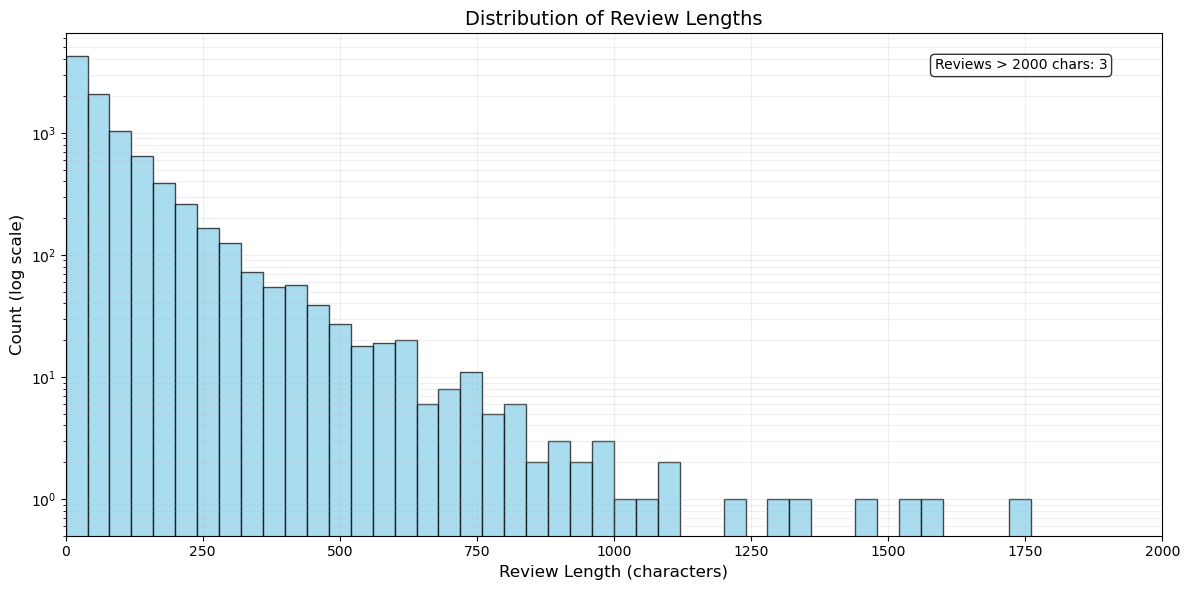

In [130]:
# 2. Review length analysis
review_lengths = df_split['review_length']

plt.figure(figsize=(12, 6))
plt.hist(review_lengths, bins=50, range=(0, 2000), alpha=0.7, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.xlabel('Review Length (characters)', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.title('Distribution of Review Lengths', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlim(0, 2000)
plt.ylim(bottom=0.5)  # To avoid log(0) issues

# Add text annotation for long reviews
long_reviews = sum(review_lengths > 2000)
plt.text(0.95, 0.95, f"Reviews > 2000 chars: {long_reviews}", 
         transform=plt.gca().transAxes, ha='right', va='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

#### (4) 리뷰 콘텐츠 내 가장 많이 언급되는 단어 확인
* 우선 카테고리 별로 확인해보기 위해 대분류로 상품군을 묶고, 해당 대분류 별로 확인함.

In [141]:
# 이세희님 코드 복사: 대분류
# 'category' 열을 '|'로 분리하여 첫 번째 요소를 'big_category' 열로 추가
df_split.loc[:, 'big_category'] = df_split['category'].apply(lambda x: x.split('|')[0])

In [146]:
# 카테고리 별 데이터 개수 체크
big_category_count = df_split.groupby('big_category').size().reset_index(name='count')
big_category_count.sort_values('count', ascending=False, inplace=True)

big_category_count

,big_category,count
4,Home&Kitchen,3513
2,Electronics,2992
1,Computers&Accessories,2559
7,OfficeProducts,248
5,HomeImprovement,16
6,MusicalInstruments,16
0,Car&Motorbike,8
8,Toys&Games,8
3,Health&PersonalCare,4


In [121]:
# 3. Word frequency analysis
def get_top_words(text_series, top_n=20):
    stop_words = set(stopwords.words('english'))
    words = []
    for review in text_series:
        if isinstance(review, str):  # Extra check to ensure we're dealing with strings
            tokens = word_tokenize(review.lower())
            words.extend([word for word in tokens if word.isalnum() and word not in stop_words])
    return Counter(words).most_common(top_n)

In [122]:
# Word frequency analysis
top_words = get_top_words(df_split['review_content'])

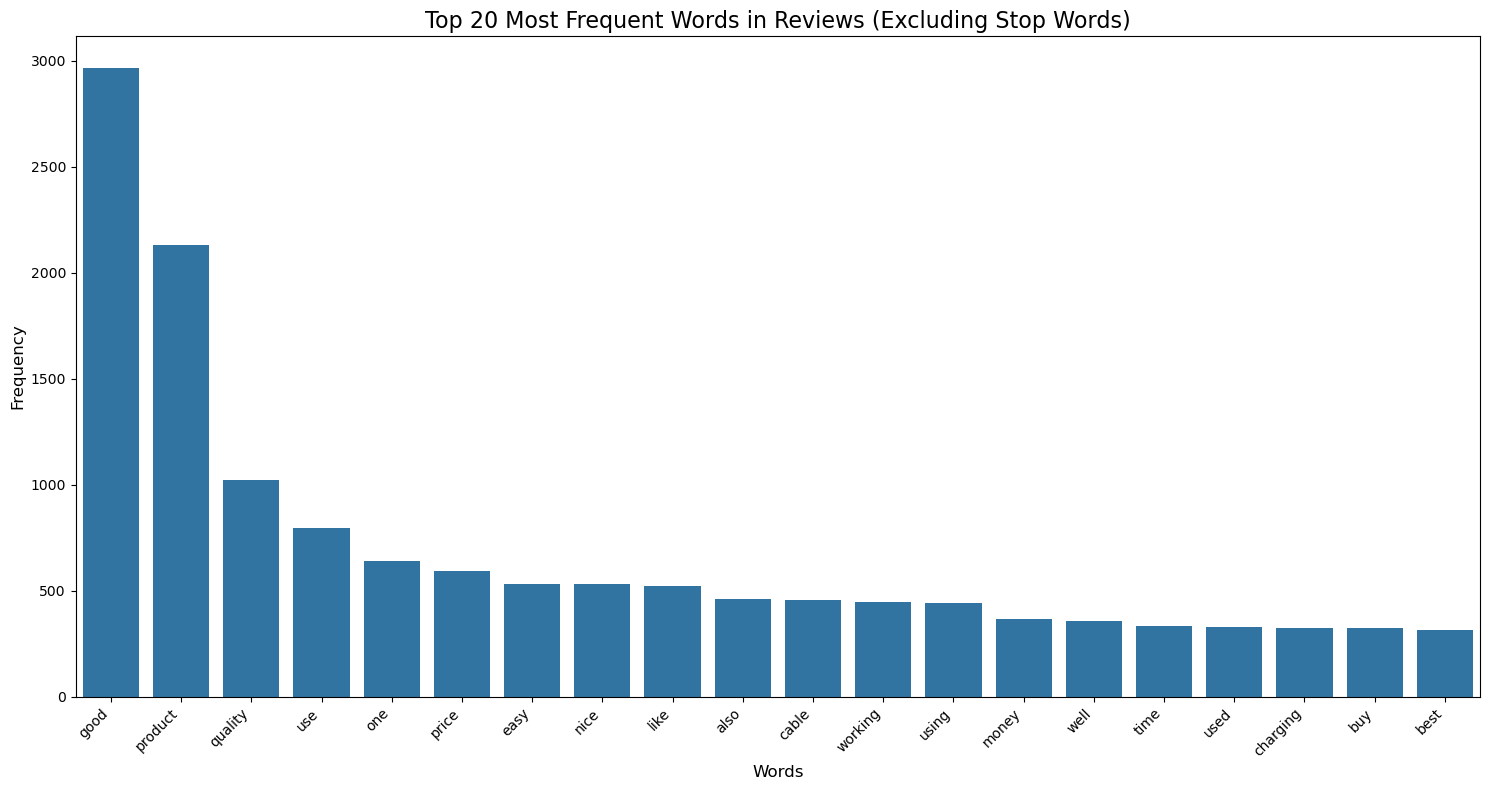

In [123]:
# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 20 Most Frequent Words in Reviews (Excluding Stop Words)', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### (5) 워드 클라우드

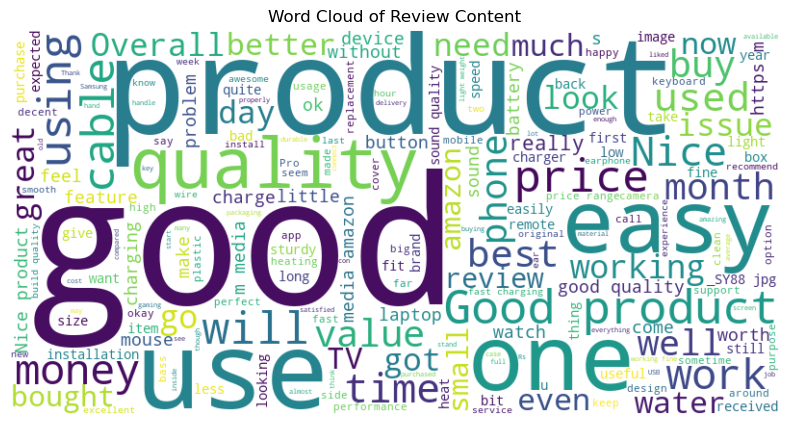

In [124]:
# 4. Word cloud
text = ' '.join(df_split['review_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()

#### (6) TextBlob을 활용한 감성분석
- 참고 블로그 1: https://pej2834.tistory.com/17
    - AFINN, VADER 등 다른 감성 사전을 기반으로 한 분석 기법도 시도해 볼 가치가 있어보임
    - 시간이 되면 주관도(subjectivity)와 해당 감정 분석의 정확도도 산출하기

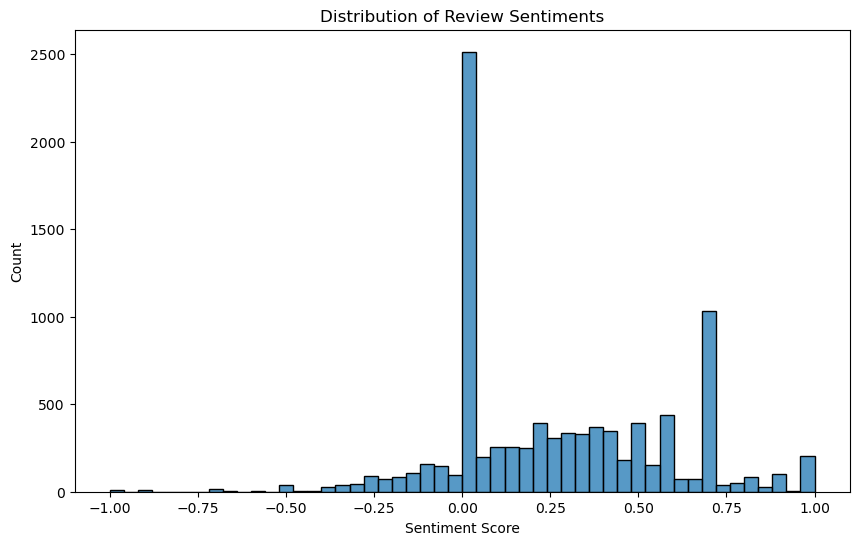

In [125]:
# 5. Sentiment analysis
df_split['sentiment'] = df_split['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df_split['sentiment'], bins=50)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Score')
plt.show()

#### (7) 감정 분석과 별점 상관관계 분석

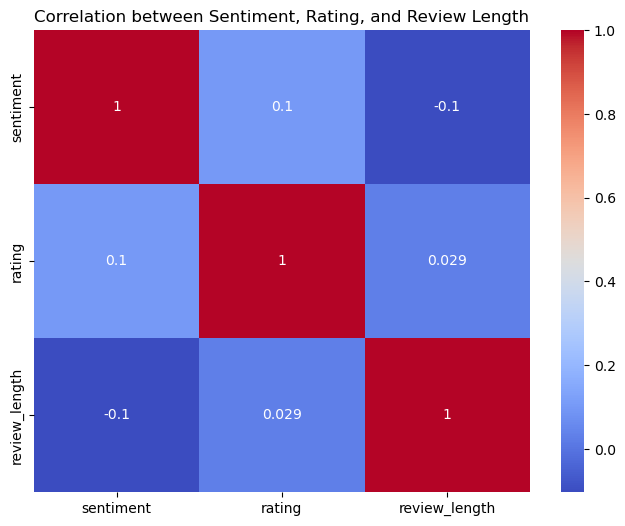

In [126]:
# 6. Correlation of sentiment with other variables
correlation = df_split[['sentiment', 'rating', 'review_length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment, Rating, and Review Length')
plt.show()